region by number of homes built
        Homes Built
Region             
M        194.375000
N        106.416667
S        469.458333
W        240.375000


Ho: The means for Homes Built in the Midwest and West are the same.
Ha: The means for Homes Built in the Midwest and the West are not the same.

This is a Welch (unequal variances) Two-Sample t test of equal means
The t test statistic is -2.917 and the p-value is 0.0044
p-value = 0.0044
Because p-value is less than alpha,
Conclusion: Reject Ho: The means are not equal



Ho: The means for Homes Built in the Midwest and Northeast are the same.
Ha: The means for Homes Built in the Midwest and Northeast are not the same.


This is a Welch (unequal variances) Two-Sample t test of equal means
The t test statistic is 7.368 and the p-value is 0.0

p-value = 0.0
Because p-value is less than alpha,
Conclusion: Reject Ho: The means are not equal


-------------------------




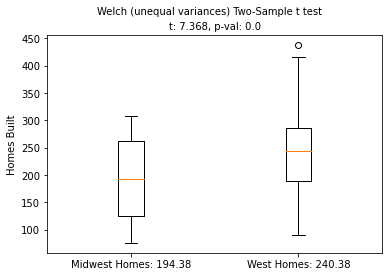

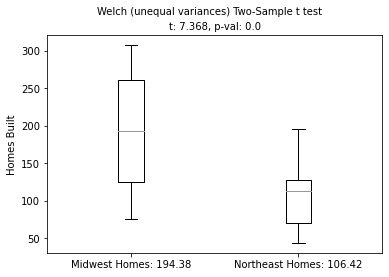

In [17]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

BedDF = pd.read_excel('bedroomdata.xls', sheet_name='ANOVA',
                      skiprows=(0, 1), header = None,
                      names=['Region', 'Homes Built'], usecols='B:C')
print("region by number of homes built")
print(BedDF.pivot_table(['Homes Built'], index=['Region']))
print()
print()

MHomes=BedDF[BedDF['Region']=='M']
NHomes=BedDF[BedDF['Region']=='N']
SHomes=BedDF[BedDF['Region']=='S']
WHomes=BedDF[BedDF['Region']=='W']
alpha = .05
tmean, p_valmean = stats.ttest_ind(MHomes['Homes Built'],
                                   WHomes['Homes Built'], equal_var=tEqVar)

print("Ho: The means for Homes Built in the Midwest and West are the same.")
print("Ha: The means for Homes Built in the Midwest and the West are not the same.")
print()

print("This is a " + ttype + " of equal means")
print(f"The t test statistic is {round(tmean,3)} and the p-value is {round(p_valmean,4)}")

print("p-value = " +str(round(p_valmean,4)))
if p_valmean < alpha:
    print("Because p-value is less than alpha,")
    print("Conclusion: Reject Ho: The means are not equal")
else:
    print("Because p-value is greater than alpha,")
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    
print()
print()
print()

print("Ho: The means for Homes Built in the Midwest and Northeast are the same.")
print("Ha: The means for Homes Built in the Midwest and Northeast are not the same.")
alpha = .05
tmean, p_valmean = stats.ttest_ind(MHomes['Homes Built'],
                                   NHomes['Homes Built'], equal_var=tEqVar)
print()
print()
print("This is a " + ttype + " of equal means")
print(f"The t test statistic is {round(tmean,3)} and the p-value is {round(p_valmean,4)}")
print()

print("p-value = " +str(round(p_valmean,4)))
if p_valmean < alpha:
    print("Because p-value is less than alpha,")
    print("Conclusion: Reject Ho: The means are not equal")
else:
    print("Because p-value is greater than alpha,")
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")

print()
print()
print("-------------------------")
print()
print()

y=[MHomes['Homes Built'],WHomes['Homes Built']]
plt.boxplot(y)
plt.title(f't: {round(tmean,3)}, p-val: {round(p_valmean,4)}', size=10)
plt.suptitle(ttype, size=10)
plt.xticks(range(1,3),[f"Midwest Homes: {round(MHomes['Homes Built'].mean(),2)}",
                       f"West Homes: {round(WHomes['Homes Built'].mean(),2)}"])
plt.ylabel('Homes Built')
plt.savefig('mwhomes.png', bbox_inches='tight')
plt.show()
print()
print()

y=[MHomes['Homes Built'],NHomes['Homes Built']]
plt.boxplot(y)
plt.title(f't: {round(tmean,3)}, p-val: {round(p_valmean,4)}', size=10)
plt.suptitle(ttype, size=10)
plt.xticks(range(1,3),[f"Midwest Homes: {round(MHomes['Homes Built'].mean(),2)}",
                       f"Northeast Homes: {round(NHomes['Homes Built'].mean(),2)}"])
plt.ylabel('Homes Built')
plt.savefig('mnhomes.png', bbox_inches='tight')
plt.show()